In [13]:
# Importing python packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os 

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

# controls default text sizes
plt.rc('lines',markersize=8)
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [59]:
# Importing files
REPO = 'viscosity_liquid_transfer_Pablo'
folder = os.getcwd().split(REPO)[0]+REPO+r'\Sartorious_experiments'
std = '204'


In [60]:
#Load data frame
df_man = pd.read_csv(folder+r'\Cleaned_Data\Viscosity_std_'+std+'_modified.csv')

#Calcualte means
df_duplicates = df_man.where(df_man.duplicated('iteration',keep=False)==True).dropna(how='all')
df_incomplete = df_man.where(df_man.duplicated('iteration',keep=False)==False).dropna(how='all')
df_mean = pd.DataFrame(columns= df_man.columns)

for index,values in df_duplicates.drop_duplicates(['aspiration_rate','dispense_rate']).iterrows():
    if len(df_duplicates.loc[index:index+2]) == 3:
        mean_error =df_duplicates.loc[index:index+2,'%error'].mean()
        df_duplicates.loc[index,'%error'] = mean_error
        df_duplicates.loc[index, 'volume'] ='mean'+str([300, 500, 1000])
        df_mean = pd.concat([df_mean,df_man.loc[index:index+2],df_duplicates.loc[[index]]])
    else:
        df_incomplete = pd.concat([df_incomplete,df_duplicates.loc[index:index+2]]).drop_duplicates()
df_mean = pd.concat([df_mean,df_incomplete])
df_man = df_mean.reset_index(drop=True)   

#Calculate iteration 
counter =1 
for row in df_man.drop_duplicates(['aspiration_rate','dispense_rate']).iterrows():
    df_repeat = df_man.loc[:,['aspiration_rate','dispense_rate']]== row[1].loc[['aspiration_rate','dispense_rate']]
    index = df_repeat.where(df_repeat.sum(axis=1)==2).dropna().index
    df_man.loc[index,'iteration']=counter
    counter+=1


In [61]:
#Load dataframe
df_exp2 = pd.read_csv(folder+r'\Code\Viscosity_std_'+std+'_BOTorch_exp2.csv')

#Calculate iterations
counter =1 
for i in range(0,len(df_exp2)+1,3):
    if len(df_exp2.loc[i:i+2,'volume'].drop_duplicates())==1:
        df_exp2.loc[i,'iteration']=counter
        counter+=1    
        df_exp2.loc[i+1,'iteration']=counter
        counter+=1  
        df_exp2.loc[i+2,'iteration']=counter
        counter+=1          
    else:
        df_exp2.loc[i:i+2,'iteration']=counter
        counter+=1



In [62]:
#Load data frame
df_exp3 = pd.read_csv(folder+r'\Code\Viscosity_std_'+std+'_BOTorch_exp3.csv')

#Calculate iteration number
counter =1 
for row in df_exp3.drop_duplicates(['aspiration_rate','dispense_rate']).iterrows():
    df_repeat = df_exp3.loc[:,['aspiration_rate','dispense_rate']]== row[1].loc[['aspiration_rate','dispense_rate']]
    index = df_repeat.where(df_repeat.sum(axis=1)==2).dropna().index
    df_exp3.loc[index,'iteration']=counter
    counter+=1

#Edit volumes to be all the same 
volumes = ['1000.0','500.0','300.0']
for volume in volumes:
    index = df_exp3.where(df_exp3.volume==volume).dropna(how='all').index
    df_exp3.loc[index,'volume'] = volume[:-2]





#### Plot for exp2 and manual calibration

In [ ]:
#Makes a figure with manual and ML calibrations, one per volume

for volume in [1000,500,300]:
    df_exp2_plot = df_exp2.where(df_exp2.volume==volume).dropna(how='all').copy()
    df_man_plot = df_man.where(df_man.volume==volume).dropna(how='all').copy()
    #Making subplots (2 rows, 1 column)
    fig,axs = plt.subplots(1,2)

    # Plotting graph 1: Iteration against error
    if volume == 1000:
        color = 'red'
    elif volume== 500:
        color = 'green'
    elif volume ==300:
        color = 'black'    
    
    if len(df_man) != 0:
        axs.flatten()[0].scatter(df_man_plot['iteration'],df_man_plot['%error'], marker= 'o', label = str(volume)+u' \u03bcL', c = color)
        axs.flatten()[0].plot(df_man_plot['iteration'],df_man_plot['%error'], label = 'Human Driven', c = 'cornflowerblue')
   
    if len(df_exp2) != 0:
        axs.flatten()[0].scatter(df_exp2_plot['iteration'],df_exp2_plot['%error'], marker= 'o', c = color)
        axs.flatten()[0].plot(df_exp2_plot['iteration'],df_exp2_plot['%error'], label = 'ML Driven', c = 'orangered')
    
    
    axs.flatten()[0].axhline(y=0, ls = '--', color = 'black', linewidth=0.5)
    axs.flatten()[0].axhline(y=2.5, ls = '--', color = 'black', linewidth=0.5)
    axs.flatten()[0].axhline(y=-2.5, ls = '--', color = 'black', linewidth=0.5)
    axs.flatten()[0].set_xlabel('Iteration')
    axs.flatten()[0].set_ylabel('Error [%]')



    axs.flatten()[1].scatter(df_exp2_plot['iteration'],df_exp2_plot['time_asp_1000'], marker= 'o', c = color)
    axs.flatten()[1].plot(df_exp2_plot['iteration'],df_exp2_plot['time_asp_1000'],  c = 'orangered')

    axs.flatten()[1].scatter(df_man_plot['iteration'],df_man_plot['time_for_1000'], marker= 'o', c = color)
    axs.flatten()[1].plot(df_man_plot['iteration'],df_man_plot['time_for_1000'], c = 'cornflowerblue')


    axs.flatten()[1].set_xlabel('Iteration')
    axs.flatten()[1].set_ylabel('Time for 1000ul (s)')

    fig.set_size_inches(15, 4)
    fig.suptitle('Viscosity_std_'+std+'_'+'_exp2_CCF_initialisation')
    fig.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=5, mode="expand", borderaxespad=0.)
    fig.tight_layout()

    REPO = 'viscosity_liquid_transfer_Pablo'
    folder = os.getcwd().split(REPO)[0]+REPO+r'\Sartorious_experiments\Finalised_Data'
    fig.savefig(folder+r'/'+'Viscosity_std_'+std+'_'+str(volume)+'_exp2_line.png')

In [46]:
df_exp3_mean.loc[20:].copy()

,liquid,pipette,volume,aspiration_rate,dispense_rate,blow_out,delay_aspirate,delay_dispense,delay_blow_out,density,time,m,%error,Transfer_Observation,Comment,iteration,time_asp_1000,acq_value
23,Viscosity_std_1275,rLine1000,"mean[300, 500, 1000]",8.632526,14.085650,False,10.0,10.0,0.0,0.8736,251.830308,0.840230,-7.814315,Incomplete Aspiration,Blowout before,6.0,206.835192,172.546455
27,Viscosity_std_1275,rLine1000,"mean[300, 500, 1000]",12.680119,4.917904,False,10.0,10.0,0.0,0.8736,345.584123,0.833630,-7.479059,Incomplete Aspiration,Blowout before,7.0,302.202254,141.599298
31,Viscosity_std_1275,rLine1000,"mean[300, 500, 1000]",3.960136,12.168608,False,10.0,10.0,0.0,0.8736,396.875160,0.786142,-7.082645,Incomplete Dispense,Blowout before,8.0,354.695247,90.768338
35,Viscosity_std_1275,rLine1000,"mean[300, 500, 1000]",4.095164,6.424205,False,10.0,10.0,0.0,0.8736,463.182168,0.848929,-4.238433,Incomplete Dispense,Blowout before,9.0,419.851735,34.581419
39,Viscosity_std_1275,rLine1000,"mean[300, 500, 1000]",3.867115,4.755213,False,10.0,10.0,0.0,0.8736,532.256652,0.850620,-4.348887,Incomplete Dispense,Blowout before,10.0,488.886211,34.098332
43,Viscosity_std_1275,rLine1000,"mean[300, 500, 1000]",15.270345,32.695116,False,10.0,10.0,0.0,0.8736,159.228307,0.737154,-16.215555,Incomplete Aspiration and Dispense,Blowout before,11.0,116.072012,17.458951
47,Viscosity_std_1275,rLine1000,"mean[300, 500, 1000]",21.837279,15.535902,False,10.0,10.0,0.0,0.8736,173.533081,0.743172,-17.000044,Incomplete Aspiration and Dispense,Blowout before,12.0,130.160287,10.132374
51,Viscosity_std_1275,rLine1000,"mean[300, 500, 1000]",8.523992,5.129182,False,10.0,10.0,0.0,0.8736,375.483870,0.853315,-4.559604,Complete Transfer,Blowout before,13.0,332.278786,49.797637
55,Viscosity_std_1275,rLine1000,"mean[300, 500, 1000]",6.512062,5.996858,False,10.0,10.0,0.0,0.8736,383.700263,0.850372,-5.210102,Complete Transfer,Blowout before,14.0,340.315176,44.781027
59,Viscosity_std_1275,rLine1000,"mean[300, 500, 1000]",8.775678,4.251169,False,10.0,10.0,0.0,0.8736,413.132080,0.848186,-6.142667,Incomplete Aspiration,Blowout before,15.0,369.180746,28.270032


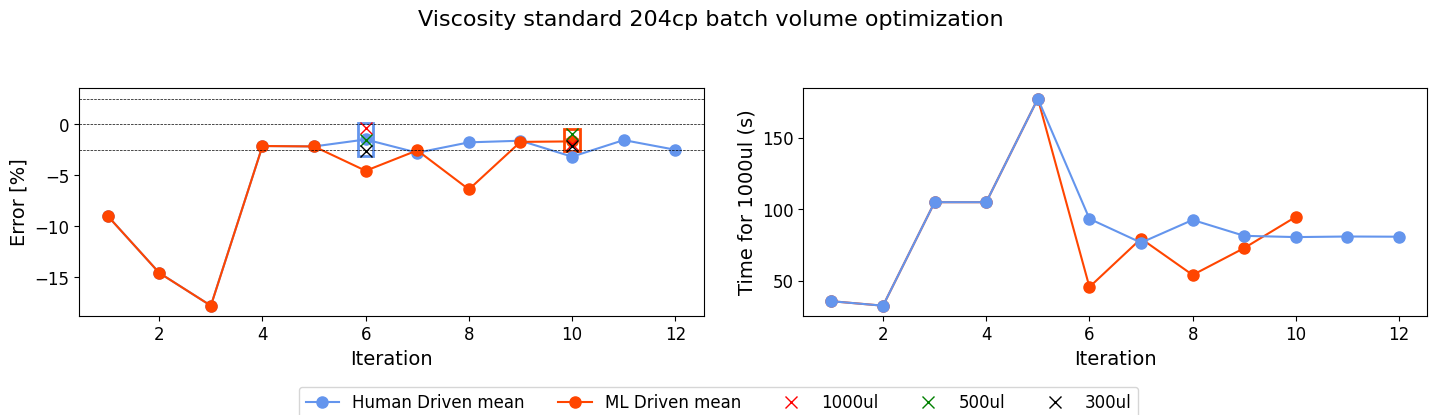

In [63]:
#Making subplots (2 rows, 2 column)
fig,axs = plt.subplots(1,2)

# Dropping NAN rows
df_man_1000 = df_man.where(df_man.volume==1000).dropna(how='all')
df_man_500 = df_man.where(df_man.volume==500).dropna(how='all')
df_man_300 = df_man.where(df_man.volume==300).dropna(how='all')
df_man_100 = df_man.where(df_man.volume==100).dropna(how='all')
df_man_mean = df_man.where(df_man.volume=='mean[300, 500, 1000]').dropna(how='all')


df_exp3_1000 = df_exp3.where(df_exp3.volume=='1000').dropna(how='all')
df_exp3_500 = df_exp3.where(df_exp3.volume=='500').dropna(how='all')
df_exp3_300 = df_exp3.where(df_exp3.volume=='300').dropna(how='all')
df_exp3_100 = df_exp3.where(df_exp3.volume=='100').dropna(how='all')
df_exp3_mean = df_exp3.where(df_exp3.volume=='mean[300, 500, 1000]').dropna(how='all')

#find min error

df_exp3_mean_min_iteration = df_exp3_mean.loc[20:].copy()[['iteration','%error']].abs().sort_values('%error').iloc[0,0]
df_man_mean_min_iteration = df_man_mean.loc[20:].copy()[['iteration','%error']].abs().sort_values('%error').iloc[0,0]

#make new dataframes with minimimum mean error values for manual calibration data
df_man_min_1000 = pd.DataFrame()
df_man_min_1000 = df_man_1000[df_man_1000['iteration'] == df_man_mean_min_iteration]
df_man_min_500 = pd.DataFrame()
df_man_min_500 = df_man_500[df_man_500['iteration'] == df_man_mean_min_iteration]
df_man_min_300 = pd.DataFrame()
df_man_min_300 = df_man_300[df_man_300['iteration'] == df_man_mean_min_iteration]


#make new dataframes with minimimum mean error values for exp3 data
df_exp3_min_1000 = pd.DataFrame()
df_exp3_min_1000 = df_exp3_1000[df_exp3_1000['iteration'] == df_exp3_mean_min_iteration]
df_exp3_min_500 = pd.DataFrame()
df_exp3_min_500 = df_exp3_500[df_exp3_500['iteration'] == df_exp3_mean_min_iteration]
df_exp3_min_300 = pd.DataFrame()
df_exp3_min_300 = df_exp3_300[df_exp3_300['iteration'] == df_exp3_mean_min_iteration]


# Plotting graph 1: Iteration against error
if len(df_man_mean) != 0:
    axs.flatten()[0].plot(df_man_mean['iteration'],df_man_mean['%error'],marker= 'o', label = 'Human Driven mean', c = 'cornflowerblue')


if len(df_exp3_mean) != 0:
    axs.flatten()[0].plot(df_exp3_mean['iteration'],df_exp3_mean['%error'],marker= 'o', label='ML Driven mean',c = 'orangered')

if len(df_man_min_1000) != 0:
    axs.flatten()[0].plot(df_man_min_1000.dropna()['iteration'],df_man_min_1000.dropna()['%error'], marker= 'x', label = '1000ul',  c = 'red',linestyle="None")

if len(df_man_min_500) != 0:
    axs.flatten()[0].plot(df_man_min_500.dropna()['iteration'],df_man_min_500.dropna()['%error'], marker= 'x', label = '500ul', c = 'green',linestyle="None")

if len(df_man_min_300) != 0:
    axs.flatten()[0].plot(df_man_min_300.dropna()['iteration'],df_man_min_300.dropna()['%error'], marker= 'x', label = '300ul', c = 'black',linestyle="None")


if len(df_exp3_min_1000) != 0:
    axs.flatten()[0].plot(df_exp3_min_1000.dropna()['iteration'],df_exp3_min_1000.dropna()['%error'], marker= 'x', c = 'red',linestyle="None")

if len(df_exp3_min_500) != 0:
    axs.flatten()[0].plot(df_exp3_min_500.dropna()['iteration'],df_exp3_min_500.dropna()['%error'], marker= 'x', c = 'green',linestyle="None")

if len(df_exp3_min_300) != 0:
    axs.flatten()[0].plot(df_exp3_min_300.dropna()['iteration'],df_exp3_min_300.dropna()['%error'], marker= 'x', c = 'black',linestyle="None")

for i in range(len(axs.flatten())-1):
    axs.flatten()[i].axhline(y=0, ls = '--', color = 'black', linewidth=0.5)
    axs.flatten()[i].axhline(y=2.5, ls = '--', color = 'black', linewidth=0.5)
    axs.flatten()[i].axhline(y=-2.5, ls = '--', color = 'black', linewidth=0.5)
    axs.flatten()[i].set_xlabel('Iteration')
    axs.flatten()[i].set_ylabel('Error [%]')



if len(df_exp3_mean) != 0:
    axs.flatten()[1].plot(df_exp3_mean['iteration'],df_exp3_mean['time_asp_1000'], marker ='o', c = 'orangered')


axs.flatten()[1].plot(df_man_mean['iteration'],df_man_1000['time_for_1000'], marker= 'o', c = 'cornflowerblue')

axs.flatten()[1].set_xlabel('Iteration')
axs.flatten()[1].set_ylabel('Time for 1000ul (s)')

fig.set_size_inches(15, 4)
fig.suptitle('Viscosity standard '+str(std)+ 'cp batch volume optimization')
fig.tight_layout(pad=2)
fig.legend( loc='lower center',ncol=5, borderaxespad=-0.2)

xmargin = .15
ymargin = .5

man_best_iter = df_man_mean_min_iteration
exp3_best_iter = df_exp3_mean_min_iteration

df_man_box = df_man[df_man['iteration'] == man_best_iter]

man_min_f0, man_max_f0 = min(df_man_box['iteration']) - xmargin, max(df_man_box['iteration']) + xmargin
man_min_f1, man_max_f1 = min(df_man_box['%error']) - ymargin, max(df_man_box['%error']) + ymargin

man_width = man_max_f0 - man_min_f0
man_height = man_max_f1 - man_min_f1

import matplotlib.patches as patches

axs[0].add_patch(
    patches.Rectangle(
        xy=(man_min_f0, man_min_f1),  # point of origin.
        width=man_width, height=man_height, linewidth=2,
        color='cornflowerblue', fill=False))

df_exp3_box = df_exp3[df_exp3['iteration'] == exp3_best_iter]

exp3_min_f0, exp3_max_f0 = min(df_exp3_box['iteration']) - xmargin, max(df_exp3_box['iteration']) + xmargin
exp3_min_f1, exp3_max_f1 = min(df_exp3_box['%error']) - ymargin, max(df_exp3_box['%error']) + ymargin

exp3_width = exp3_max_f0 - exp3_min_f0
exp3_height = exp3_max_f1 - exp3_min_f1


axs[0].add_patch(
    patches.Rectangle(
        xy=(exp3_min_f0, exp3_min_f1),  # point of origin.
        width=exp3_width, height=exp3_height, linewidth=2,
        color='orangered', fill=False))

REPO = 'viscosity_liquid_transfer_Pablo'
folder = os.getcwd().split(REPO)[0]+REPO+r'\Sartorious_experiments\Finalised_Data'
fig.savefig(folder+r'/'+'Viscosity_std_'+std+'_exp3_line.png')




In [22]:
df_exp3.loc[96:99,'iteration'] = 25.0
df_exp3

,liquid,pipette,volume,aspiration_rate,dispense_rate,blow_out,delay_aspirate,delay_dispense,delay_blow_out,density,time,m,%error,Transfer_Observation,Comment,iteration,time_asp_1000,acq_value
0,Viscosity_std_1275,rLine1000,1000,28.915134,28.915134,False,10,10,0,0.8736,132.773934,0.788634,-9.725963,Incomplete aspiration and dispense,Blowout before,1.0,89.167931,NaN
1,Viscosity_std_1275,rLine1000,500,28.915134,28.915134,False,10,10,0,0.8736,97.980054,0.365575,-16.305995,Incomplete aspiration and dispense,Blowout before,1.0,89.167931,NaN
2,Viscosity_std_1275,rLine1000,300,28.915134,28.915134,False,10,10,0,0.8736,84.264670,0.202553,-22.713117,Incomplete aspiration and dispense,Blowout before,1.0,89.167931,NaN
3,Viscosity_std_1275,rLine1000,"mean[300, 500, 1000]",28.915134,28.915134,False,10,10,0,0.8736,132.773934,0.788634,-16.248358,Incomplete aspiration and dispense,Blowout before,1.0,89.167931,NaN
4,Viscosity_std_1275,rLine1000,1000,36.143918,36.143918,False,10,10,0,0.8736,119.593486,0.612891,-29.843014,Incomplete aspiration and dispense,Blowout before,2.0,75.334345,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Viscosity_std_1275,rLine1000,"mean[300, 500, 1000]",4.605809,7.135577,False,10,10,0,0.8736,420.585908,0.854000,-5.442687,Complete Transfer,Blowout before,24.0,377.259945,16.182838
96,Viscosity_std_1275,rLine1000,1000,3.867115,4.755213,False,10,10,0,0.8736,532.434517,0.851115,-2.573826,Incomplete Dispense,Blowout before,25.0,488.886211,15.856457
97,Viscosity_std_1275,rLine1000,500,3.867115,4.755213,False,10,10,0,0.8736,297.805922,0.427882,-2.041753,Incomplete Dispense,Blowout before,25.0,488.886211,15.856457
98,Viscosity_std_1275,rLine1000,300,3.867115,4.755213,False,10,10,0,0.8736,204.135524,0.250128,-4.560345,Incomplete Dispense,Blowout before,25.0,488.886211,15.856457


In [21]:
type(df_exp3.loc[1,'iteration'])

numpy.float64

In [39]:
df_exp3_mean_min_iteration
# df_man_mean_min_iteration 

5.0

In [40]:
df_man_mean_min_iteration

9

In [37]:
df_exp3_mean.loc[20:]

,liquid,pipette,volume,aspiration_rate,dispense_rate,blow_out,delay_aspirate,delay_dispense,delay_blow_out,density,time,m,%error,Transfer_Observation,Comment,iteration,time_asp_1000,acq_value
23,Viscosity_std_1275,rLine1000,"mean[300, 500, 1000]",8.632526,14.085650,False,10.0,10.0,0.0,0.8736,251.830308,0.840230,-7.814315,Incomplete Aspiration,Blowout before,6.0,206.835192,172.546455
27,Viscosity_std_1275,rLine1000,"mean[300, 500, 1000]",12.680119,4.917904,False,10.0,10.0,0.0,0.8736,345.584123,0.833630,-7.479059,Incomplete Aspiration,Blowout before,7.0,302.202254,141.599298
31,Viscosity_std_1275,rLine1000,"mean[300, 500, 1000]",3.960136,12.168608,False,10.0,10.0,0.0,0.8736,396.875160,0.786142,-7.082645,Incomplete Dispense,Blowout before,8.0,354.695247,90.768338
35,Viscosity_std_1275,rLine1000,"mean[300, 500, 1000]",4.095164,6.424205,False,10.0,10.0,0.0,0.8736,463.182168,0.848929,-4.238433,Incomplete Dispense,Blowout before,9.0,419.851735,34.581419
39,Viscosity_std_1275,rLine1000,"mean[300, 500, 1000]",3.867115,4.755213,False,10.0,10.0,0.0,0.8736,532.256652,0.850620,-4.348887,Incomplete Dispense,Blowout before,10.0,488.886211,34.098332
43,Viscosity_std_1275,rLine1000,"mean[300, 500, 1000]",15.270345,32.695116,False,10.0,10.0,0.0,0.8736,159.228307,0.737154,-16.215555,Incomplete Aspiration and Dispense,Blowout before,11.0,116.072012,17.458951
47,Viscosity_std_1275,rLine1000,"mean[300, 500, 1000]",21.837279,15.535902,False,10.0,10.0,0.0,0.8736,173.533081,0.743172,-17.000044,Incomplete Aspiration and Dispense,Blowout before,12.0,130.160287,10.132374
51,Viscosity_std_1275,rLine1000,"mean[300, 500, 1000]",8.523992,5.129182,False,10.0,10.0,0.0,0.8736,375.483870,0.853315,-4.559604,Complete Transfer,Blowout before,13.0,332.278786,49.797637
55,Viscosity_std_1275,rLine1000,"mean[300, 500, 1000]",6.512062,5.996858,False,10.0,10.0,0.0,0.8736,383.700263,0.850372,-5.210102,Complete Transfer,Blowout before,14.0,340.315176,44.781027
59,Viscosity_std_1275,rLine1000,"mean[300, 500, 1000]",8.775678,4.251169,False,10.0,10.0,0.0,0.8736,413.132080,0.848186,-6.142667,Incomplete Aspiration,Blowout before,15.0,369.180746,28.270032
